In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
from biopandas.pdb import PandasPdb

In [7]:
base = "VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK"

testCsvPath = "../novozymes-enzyme-stability-prediction-kaggle-2022/data/test.csv"
trainCsvPath = "../novozymes-enzyme-stability-prediction-kaggle-2022/data/train.csv"
pdbPath = "../novozymes-enzyme-stability-prediction-kaggle-2022/sample_data/wildtype_structure_prediction_af2.pdb"

testDF = pd.read_csv(testCsvPath)
trainDF = pd.read_csv(testCsvPath)
pdbDF =  PandasPdb().read_pdb(pdbPath)

In [8]:
testDF.head

<bound method NDFrame.head of       seq_id                                   protein_sequence  pH  \
0      31390  VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
1      31391  VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2      31392  VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...   8   
3      31393  VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
4      31394  VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
...      ...                                                ...  ..   
2408   33798  VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2409   33799  VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2410   33800  VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2411   33801  VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   
2412   33802  VPVNPEPDATSVENVWLKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   

     data_source  
0      Novozymes  
1      Novozymes  
2      Novozymes  
3      Novozymes  
4      Novozymes  
...

In [9]:
pdbDF.df["ATOM"]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,VAL,,A,1,,...,34.064,-6.456,50.464,1.0,45.11,,,N,NaN,0
1,ATOM,2,,H,,VAL,,A,1,,...,33.576,-6.009,51.228,1.0,45.11,,,H,NaN,1
2,ATOM,3,,H2,,VAL,,A,1,,...,33.882,-7.449,50.477,1.0,45.11,,,H,NaN,2
3,ATOM,4,,H3,,VAL,,A,1,,...,35.060,-6.323,50.566,1.0,45.11,,,H,NaN,3
4,ATOM,5,,CA,,VAL,,A,1,,...,33.643,-5.877,49.162,1.0,45.11,,,C,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,ATOM,3313,,NZ,,LYS,,A,221,,...,4.616,13.323,-4.301,1.0,93.80,,,N,NaN,3312
3313,ATOM,3314,,HZ1,,LYS,,A,221,,...,5.270,12.565,-4.432,1.0,93.80,,,H,NaN,3313
3314,ATOM,3315,,HZ2,,LYS,,A,221,,...,4.585,13.517,-3.310,1.0,93.80,,,H,NaN,3314
3315,ATOM,3316,,HZ3,,LYS,,A,221,,...,4.965,14.143,-4.776,1.0,93.80,,,H,NaN,3315


annotating on the full PDB file mannually, there is a lot of blanks such as alt_loc, insertion

ATOM     14 HG13 VAL A   1      33.768  -3.972  47.035  1.00 45.11           H  
record type index atom_name residue_name chain_id residue_number x y z occupation B-factor element_symbol

(array([ 179.,   34.,   29.,    0.,    0.,   22.,    0.,   14.,   98.,
        2941.]),
 array([38.11 , 44.169, 50.228, 56.287, 62.346, 68.405, 74.464, 80.523,
        86.582, 92.641, 98.7  ]),
 <BarContainer object of 10 artists>)

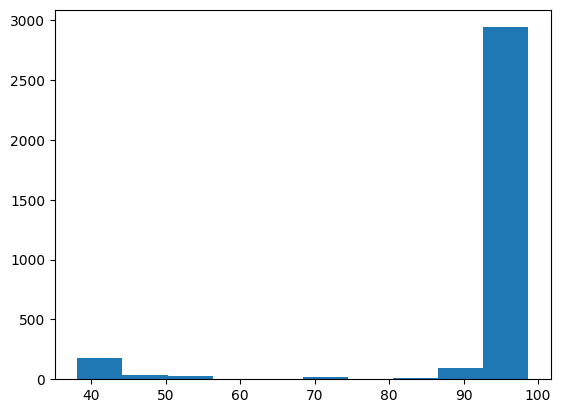

In [10]:
b_factors = pdbDF.df["ATOM"]["b_factor"]
plt.hist(b_factors) # normal range is 15-30

In [11]:
def plt_cols(s, mode="hist", record_type="ATOM"):
    if mode == "hist":
        plt.hist(pdbDF.df[record_type][s])

: 